In [7]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import json
import requests
import time
from api_keys_vm_copy import g_key
from scipy import stats as st
# linear modelling
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [8]:
import gmaps
gmaps.configure(g_key)

In [9]:
df=pd.read_csv("location_data.csv")
df.head()

,Season,Name,Last Name,Followers(k),Age,City,State,Country,Occupation,Outcome,Elimination_Week,Place,Note,Was_Bachelorette,Address,latitude,longitude,clean_city,clean_state,clean_country
0,18,Christy,Hansen,0.148,24.0,Aurora,Illinois,USA,Media,Week 3,3,14.0,NaN,0,"Aurora, Illinois, USA",41.757170,-88.314754,Aurora,Illinois,US
1,19,Reegan,Cornwell,0.566,28.0,Manhattan Beach,California,USA,Sales,Week 1,1,24.0,NaN,0,"Manhattan Beach, California, USA",33.891599,-118.395124,Manhattan Beach,California,US
2,18,Amy,Jokinen,0.640,31.0,Apopka,Florida,USA,Health Related Field,Week 1,1,19.0,NaN,0,"Apopka, Florida, USA",28.677968,-81.511521,Apopka,Florida,US
3,18,Ashley,Poe,0.673,25.0,Roanoke,Texas,USA,Education,Week 1,1,19.0,NaN,0,"Roanoke, Texas, USA",33.004013,-97.225848,Roanoke,Texas,US
4,19,Nikki,Delventhal,0.807,26.0,Hasbrouck Heights,New Jersey,USA,Unemployed,Week 4,4,12.0,NaN,0,"Hasbrouck Heights, New Jersey, USA",40.857929,-74.081669,Hasbrouck Heights,New Jersey,US


In [10]:
#Create Season Bins
df["Season Bin"]=None
df.loc[df.Season <= 7, "Season Bin"] = "1-7"
df.loc[(df.Season > 7) & (df.Season <= 14), "Season Bin"] = "8-14"
df.loc[df.Season >14, "Season Bin"] = "15-21"
df.head()

,Season,Name,Last Name,Followers(k),Age,City,State,Country,Occupation,Outcome,...,Place,Note,Was_Bachelorette,Address,latitude,longitude,clean_city,clean_state,clean_country,Season Bin
0,18,Christy,Hansen,0.148,24.0,Aurora,Illinois,USA,Media,Week 3,...,14.0,NaN,0,"Aurora, Illinois, USA",41.757170,-88.314754,Aurora,Illinois,US,15-21
1,19,Reegan,Cornwell,0.566,28.0,Manhattan Beach,California,USA,Sales,Week 1,...,24.0,NaN,0,"Manhattan Beach, California, USA",33.891599,-118.395124,Manhattan Beach,California,US,15-21
2,18,Amy,Jokinen,0.640,31.0,Apopka,Florida,USA,Health Related Field,Week 1,...,19.0,NaN,0,"Apopka, Florida, USA",28.677968,-81.511521,Apopka,Florida,US,15-21
3,18,Ashley,Poe,0.673,25.0,Roanoke,Texas,USA,Education,Week 1,...,19.0,NaN,0,"Roanoke, Texas, USA",33.004013,-97.225848,Roanoke,Texas,US,15-21
4,19,Nikki,Delventhal,0.807,26.0,Hasbrouck Heights,New Jersey,USA,Unemployed,Week 4,...,12.0,NaN,0,"Hasbrouck Heights, New Jersey, USA",40.857929,-74.081669,Hasbrouck Heights,New Jersey,US,15-21


In [11]:
df["Age Bin"]=None
df.loc[(df.Age >= 20) & (df.Age <= 25), "Age Bin"] = "20-25"
df.loc[(df.Age > 25) & (df.Age <= 29), "Age Bin"] = "26-29"
df.loc[(df.Age > 29) & (df.Age <= 35), "Age Bin"] = "30-35"
df.loc[(df.Age > 35) & (df.Age <= 39), "Age Bin"] = "36-39"
df.head()

,Season,Name,Last Name,Followers(k),Age,City,State,Country,Occupation,Outcome,...,Note,Was_Bachelorette,Address,latitude,longitude,clean_city,clean_state,clean_country,Season Bin,Age Bin
0,18,Christy,Hansen,0.148,24.0,Aurora,Illinois,USA,Media,Week 3,...,NaN,0,"Aurora, Illinois, USA",41.757170,-88.314754,Aurora,Illinois,US,15-21,20-25
1,19,Reegan,Cornwell,0.566,28.0,Manhattan Beach,California,USA,Sales,Week 1,...,NaN,0,"Manhattan Beach, California, USA",33.891599,-118.395124,Manhattan Beach,California,US,15-21,26-29
2,18,Amy,Jokinen,0.640,31.0,Apopka,Florida,USA,Health Related Field,Week 1,...,NaN,0,"Apopka, Florida, USA",28.677968,-81.511521,Apopka,Florida,US,15-21,30-35
3,18,Ashley,Poe,0.673,25.0,Roanoke,Texas,USA,Education,Week 1,...,NaN,0,"Roanoke, Texas, USA",33.004013,-97.225848,Roanoke,Texas,US,15-21,20-25
4,19,Nikki,Delventhal,0.807,26.0,Hasbrouck Heights,New Jersey,USA,Unemployed,Week 4,...,NaN,0,"Hasbrouck Heights, New Jersey, USA",40.857929,-74.081669,Hasbrouck Heights,New Jersey,US,15-21,26-29


In [12]:
df["Elimination Bin"]=None
df.loc[(df.Elimination_Week >= 1) & (df.Elimination_Week <= 4), "Elimination Bin"] = "1-4"
df.loc[(df.Elimination_Week >= 5) & (df.Elimination_Week <= 7), "Elimination Bin"] = "5-7"
df.loc[(df.Elimination_Week >= 8) & (df.Elimination_Week <= 10), "Elimination Bin"] = "8-10"

df.head()

,Season,Name,Last Name,Followers(k),Age,City,State,Country,Occupation,Outcome,...,Was_Bachelorette,Address,latitude,longitude,clean_city,clean_state,clean_country,Season Bin,Age Bin,Elimination Bin
0,18,Christy,Hansen,0.148,24.0,Aurora,Illinois,USA,Media,Week 3,...,0,"Aurora, Illinois, USA",41.757170,-88.314754,Aurora,Illinois,US,15-21,20-25,1-4
1,19,Reegan,Cornwell,0.566,28.0,Manhattan Beach,California,USA,Sales,Week 1,...,0,"Manhattan Beach, California, USA",33.891599,-118.395124,Manhattan Beach,California,US,15-21,26-29,1-4
2,18,Amy,Jokinen,0.640,31.0,Apopka,Florida,USA,Health Related Field,Week 1,...,0,"Apopka, Florida, USA",28.677968,-81.511521,Apopka,Florida,US,15-21,30-35,1-4
3,18,Ashley,Poe,0.673,25.0,Roanoke,Texas,USA,Education,Week 1,...,0,"Roanoke, Texas, USA",33.004013,-97.225848,Roanoke,Texas,US,15-21,20-25,1-4
4,19,Nikki,Delventhal,0.807,26.0,Hasbrouck Heights,New Jersey,USA,Unemployed,Week 4,...,0,"Hasbrouck Heights, New Jersey, USA",40.857929,-74.081669,Hasbrouck Heights,New Jersey,US,15-21,26-29,1-4


In [13]:
df["Season Bin"].value_counts()

15-21    196
8-14     151
1-7       75
Name: Season Bin, dtype: int64

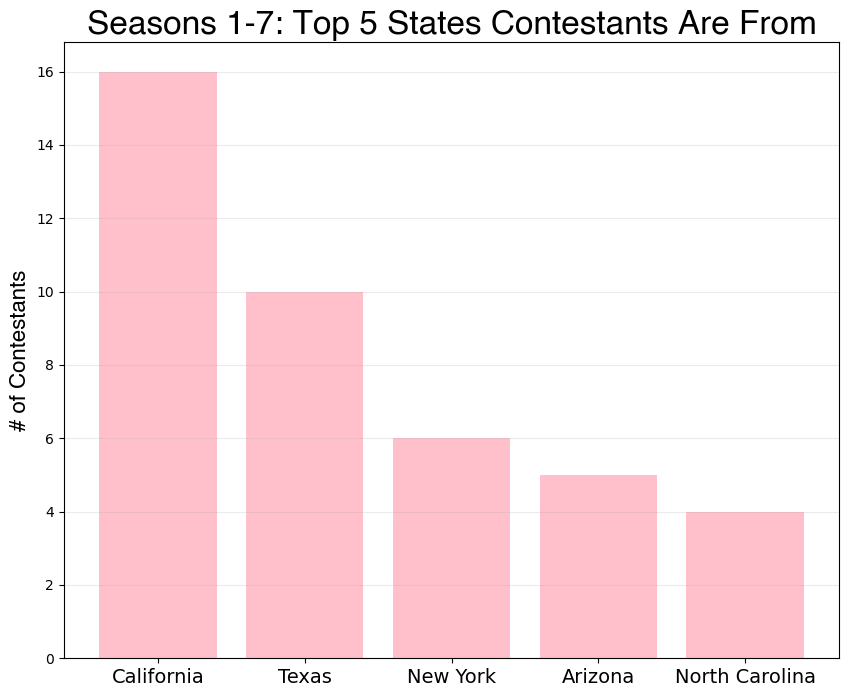

In [14]:
#Top 5 State locations for Seasons 1-7 bar chart 

states = df.loc[df["Season Bin"] == "1-7"].clean_state.value_counts().head()
x = states.index
y = states.values

# step 2 - make/init the plot
fig = plt.figure(figsize=(10, 8))
plt.bar(x, y, color="pink")

# step 3 - customization
plt.ylabel("# of Contestants", fontname = "Helvetica", fontsize=16)
plt.title("Seasons 1-7: Top 5 States Contestants Are From", fontsize=24, fontweight="bold", fontname = "Helvetica")
plt.xticks(fontsize=14, rotation=0)

plt.grid(axis="y", alpha=0.25)

# step 4 - show/save the plot
plt.show()

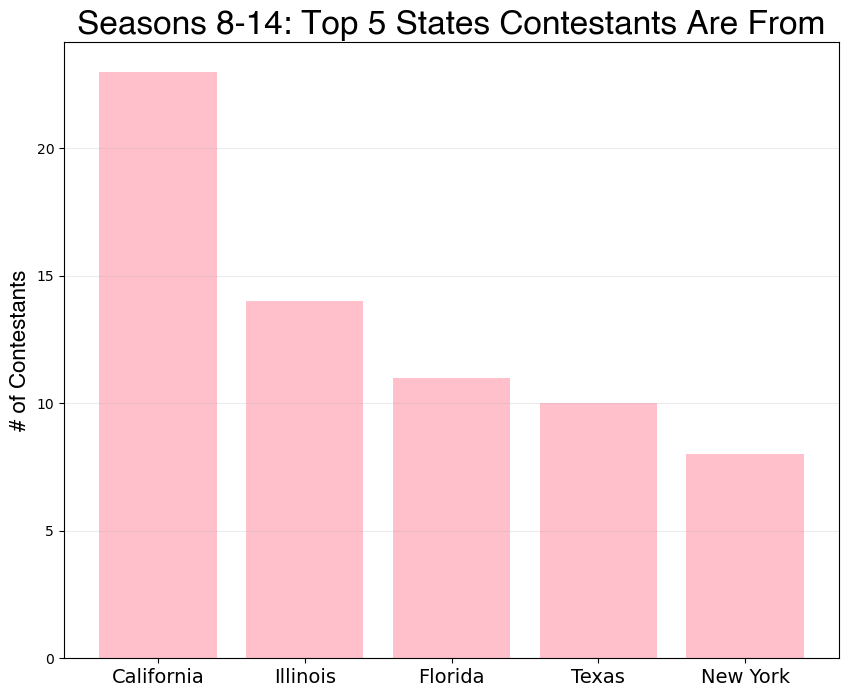

In [15]:
#State locations for Seasons 8-14 bar chart 

states = df.loc[df["Season Bin"] == "8-14"].clean_state.value_counts().head(5)
x = states.index
y = states.values

# step 2 - make/init the plot
fig = plt.figure(figsize=(10, 8))
plt.bar(x, y,  color="pink")

# step 3 - customization
plt.ylabel("# of Contestants", fontname = "Helvetica", fontsize=16)
plt.title("Seasons 8-14: Top 5 States Contestants Are From", fontsize=24, fontweight="bold", fontname = "Helvetica")
plt.xticks(fontsize=14, rotation=0)

plt.grid(axis="y", alpha=0.25)

# step 4 - show/save the plot
plt.show()

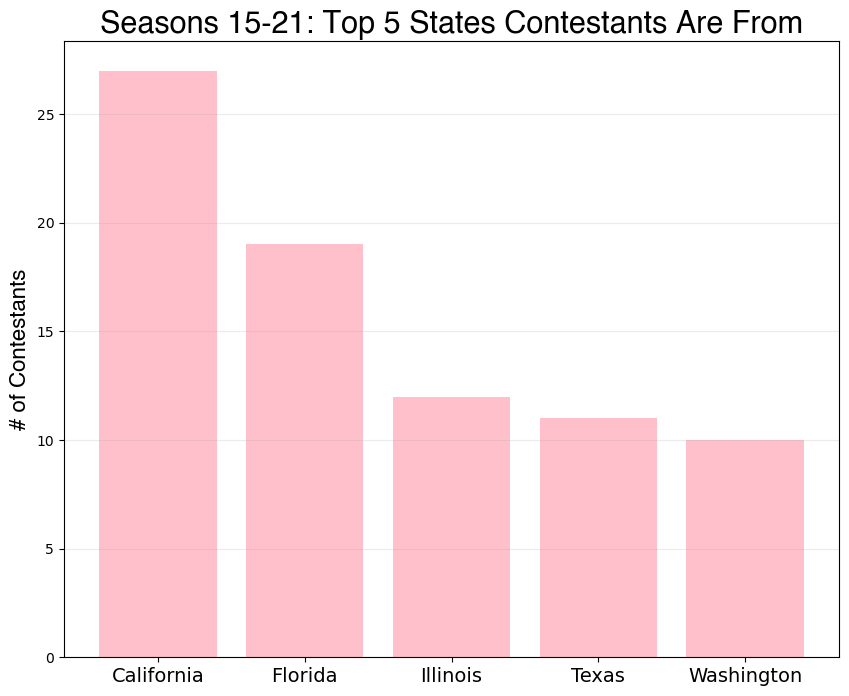

In [16]:
#State locations for Seasons 15-21 bar chart 
states = df.loc[df["Season Bin"] == "15-21"].clean_state.value_counts().head(5)
x = states.index
y = states.values

# step 2 - make/init the plot
fig = plt.figure(figsize=(10, 8))
plt.bar(x, y,  color="pink")

# step 3 - customization
plt.ylabel("# of Contestants", fontname = "Helvetica", fontsize=16)
plt.title("Seasons 15-21: Top 5 States Contestants Are From", fontsize=22, fontweight="bold", fontname = "Helvetica")
plt.xticks(fontsize=14, rotation=0)

plt.grid(axis="y", alpha=0.25)

# step 4 - show/save the plot
plt.show()

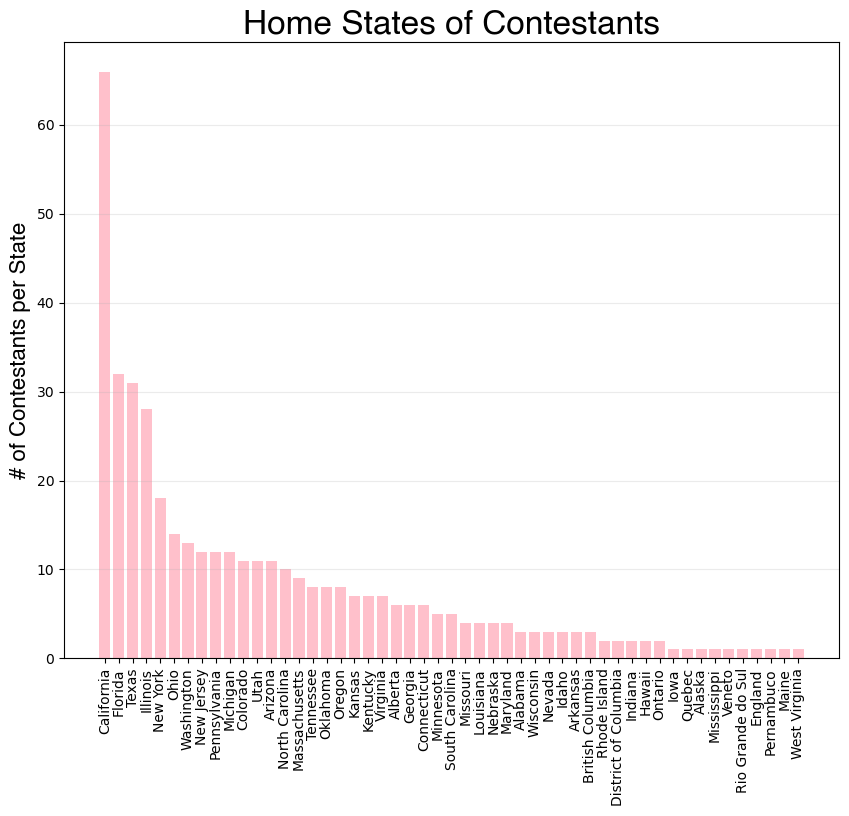

In [17]:
#BAR CHART of Contestants by State for all Seasons in Data Set
# step 1 - get the data
states = df.clean_state.value_counts()

x = states.index
y = states.values

# step 2 - make/init the plot
fig = plt.figure(figsize=(10, 8))
plt.bar(x, y, color="pink")

# step 3 - customization
plt.ylabel("# of Contestants per State", fontname = "Helvetica", fontsize=16)
plt.title("Home States of Contestants", fontsize=24, fontweight="bold", fontname = "Helvetica")
plt.xticks(fontsize=10, rotation=90)

plt.grid(axis="y", alpha=0.25)

# step 4 - show/save the plot
plt.show()

In [ ]:
#California, Florida, Texas, Illinois, & New York are the top 5 States that contestants are from on The Bachelor

In [18]:
#Where All Contestants are from 
# get data
data = df.loc[:, ["latitude", "longitude"]].dropna()

# Create BASE, init the graph
figure_layout = {
    'width': '800px',
    'height': '600px',
    'border': '0px',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout, map_type='SATELLITE')

# init the overlay layers
heat = gmaps.heatmap_layer(data)
fig.add_layer(heat)

# show the plot
fig

Figure(layout=FigureLayout(border='0px', height='600px', margin='0 auto 0 auto', padding='1px', width='800px')…

In [19]:
df.columns

Index(['Season', 'Name', 'Last Name', 'Followers(k)', 'Age', 'City', 'State',
       'Country', 'Occupation', 'Outcome', 'Elimination_Week', 'Place', 'Note',
       'Was_Bachelorette', 'Address', 'latitude', 'longitude', 'clean_city',
       'clean_state', 'clean_country', 'Season Bin', 'Age Bin',
       'Elimination Bin'],
      dtype='object')

In [20]:
#Contestants that "placed"/made it to the top 5 
df2 = df.loc[df.Place<=5]
df2.head()

,Season,Name,Last Name,Followers(k),Age,City,State,Country,Occupation,Outcome,...,Was_Bachelorette,Address,latitude,longitude,clean_city,clean_state,clean_country,Season Bin,Age Bin,Elimination Bin
54,18,Chelsie,Webster,22.898,24.0,Lexington,Ohio,USA,Health Related Field,Week 7,...,0,"Lexington, Ohio, USA",40.678720,-82.582775,Lexington,Ohio,US,15-21,20-25,5-7
88,18,Clare,Crawley,274.949,32.0,Sacramento,California,USA,Beautician,Runner-up,...,0,"Sacramento, California, USA",38.581061,-121.493895,Sacramento,California,US,15-21,30-35,8-10
89,21,Kristina,Schulman,311.000,24.0,Lexington,Kentucky,USA,Health Related Field,Week 7,...,0,"Lexington, Kentucky, USA",38.046407,-84.497039,Lexington,Kentucky,US,15-21,20-25,5-7
92,18,Renee,Oteri,323.000,32.0,Martha's Vineyard,Massachusetts,USA,Real Estate,Week 8,...,0,"Martha's Vineyard, Massachusetts, USA",41.392021,-70.620748,Martha's Vineyard,Massachusetts,US,15-21,30-35,8-10
93,20,Caila,Quinn,350.000,24.0,Hudson,Ohio,USA,Sales,Week 9,...,0,"Hudson, Ohio, USA",41.240056,-81.440667,Hudson,Ohio,US,15-21,20-25,8-10


In [21]:
#Where Contestants that made it to the Top 5 are from

# get data
data = df2.loc[:, ["latitude", "longitude"]].dropna()

# Create BASE, init the graph
figure_layout = {
    'width': '800px',
    'height': '600px',
    'border': '0px',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout, map_type='SATELLITE')

# init the overlay layers
heat = gmaps.heatmap_layer(data)
fig.add_layer(heat)

# show the plot
fig

Figure(layout=FigureLayout(border='0px', height='600px', margin='0 auto 0 auto', padding='1px', width='800px')…

In [22]:
df2.clean_state.value_counts()

Texas             6
California        5
Florida           4
Massachusetts     3
Colorado          3
Washington        3
Ohio              2
Louisiana         2
North Carolina    2
New York          2
Oregon            2
Alberta           2
Arkansas          2
Kentucky          2
Georgia           1
Quebec            1
Nebraska          1
Michigan          1
Missouri          1
Wisconsin         1
Utah              1
Maine             1
West Virginia     1
Tennessee         1
Arizona           1
Alabama           1
Name: clean_state, dtype: int64

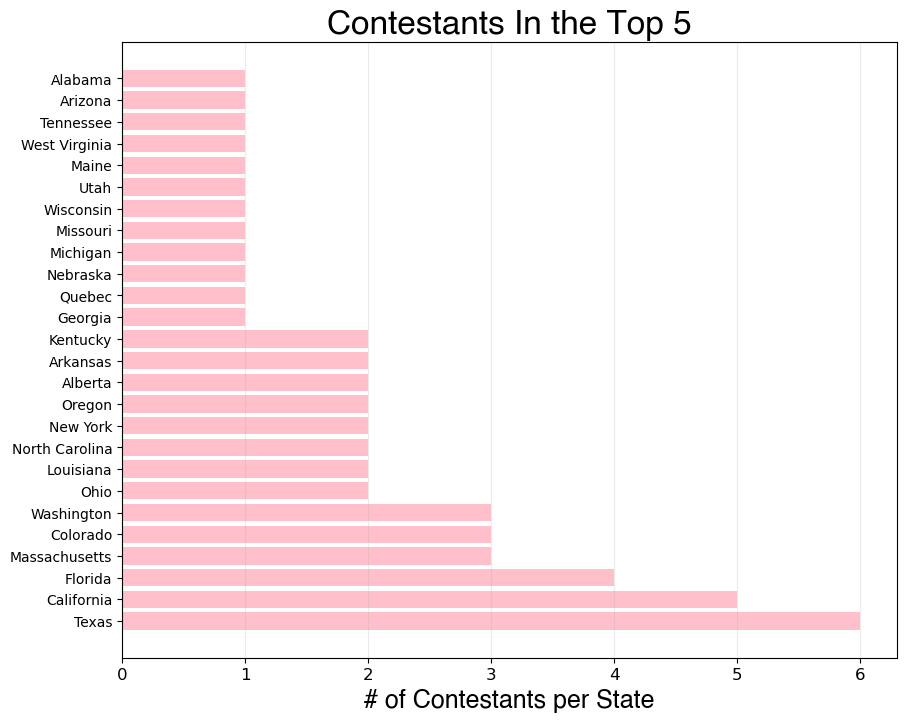

In [23]:
#Where Contestants that made it to the Top 5 are from 

# step 1 - get the data
states = df2.clean_state.value_counts()

x = states.index
y = states.values

# step 2 - make/init the plot
fig = plt.figure(figsize=(10, 8))
plt.barh(x, y, color="pink")

# step 3 - customization
plt.xlabel("# of Contestants per State", fontname = "Helvetica", fontsize=18)
plt.title("Contestants In the Top 5", fontsize=24, fontweight="bold", fontname = "Helvetica")
plt.xticks(fontsize=12, rotation=0)

plt.grid(axis="x", alpha=0.25)

# step 4 - show/save the plot
plt.show()

In [24]:
#locations of contestants in the top 5 divided by locations of all contestants

statesfinal = df2.clean_state.value_counts()
states = df.clean_state.value_counts()
data = statesfinal/states
data.sort_values(ascending=False)

West Virginia           1.000000
Quebec                  1.000000
Maine                   1.000000
Arkansas                0.666667
Louisiana               0.500000
Alabama                 0.333333
Alberta                 0.333333
Massachusetts           0.333333
Wisconsin               0.333333
Kentucky                0.285714
Colorado                0.272727
Oregon                  0.250000
Nebraska                0.250000
Missouri                0.250000
Washington              0.230769
North Carolina          0.200000
Texas                   0.193548
Georgia                 0.166667
Ohio                    0.142857
Florida                 0.125000
Tennessee               0.125000
New York                0.111111
Utah                    0.090909
Arizona                 0.090909
Michigan                0.083333
California              0.075758
Alaska                       NaN
British Columbia             NaN
Connecticut                  NaN
District of Columbia         NaN
England   

In [25]:
df3 = pd.DataFrame()
df3["Finalists"] = statesfinal
df3["Contestants"] = states
df3["Percent"] = statesfinal/states
df3.loc[df3.Contestants>7].sort_values(by="Percent", ascending=False) 

#>7 to show states that had at least 7 contestants. More data means more trust in the evidence/conclusions 

,Finalists,Contestants,Percent
Massachusetts,3,9,0.333333
Colorado,3,11,0.272727
Oregon,2,8,0.250000
Washington,3,13,0.230769
North Carolina,2,10,0.200000
Texas,6,31,0.193548
Ohio,2,14,0.142857
Florida,4,32,0.125000
Tennessee,1,8,0.125000
New York,2,18,0.111111


In [26]:
df.head()

,Season,Name,Last Name,Followers(k),Age,City,State,Country,Occupation,Outcome,...,Was_Bachelorette,Address,latitude,longitude,clean_city,clean_state,clean_country,Season Bin,Age Bin,Elimination Bin
0,18,Christy,Hansen,0.148,24.0,Aurora,Illinois,USA,Media,Week 3,...,0,"Aurora, Illinois, USA",41.757170,-88.314754,Aurora,Illinois,US,15-21,20-25,1-4
1,19,Reegan,Cornwell,0.566,28.0,Manhattan Beach,California,USA,Sales,Week 1,...,0,"Manhattan Beach, California, USA",33.891599,-118.395124,Manhattan Beach,California,US,15-21,26-29,1-4
2,18,Amy,Jokinen,0.640,31.0,Apopka,Florida,USA,Health Related Field,Week 1,...,0,"Apopka, Florida, USA",28.677968,-81.511521,Apopka,Florida,US,15-21,30-35,1-4
3,18,Ashley,Poe,0.673,25.0,Roanoke,Texas,USA,Education,Week 1,...,0,"Roanoke, Texas, USA",33.004013,-97.225848,Roanoke,Texas,US,15-21,20-25,1-4
4,19,Nikki,Delventhal,0.807,26.0,Hasbrouck Heights,New Jersey,USA,Unemployed,Week 4,...,0,"Hasbrouck Heights, New Jersey, USA",40.857929,-74.081669,Hasbrouck Heights,New Jersey,US,15-21,26-29,1-4


In [31]:
df4 = df.loc[df.latitude>0]
df4.head()

,Season,Name,Last Name,Followers(k),Age,City,State,Country,Occupation,Outcome,...,Was_Bachelorette,Address,latitude,longitude,clean_city,clean_state,clean_country,Season Bin,Age Bin,Elimination Bin
0,18,Christy,Hansen,0.148,24.0,Aurora,Illinois,USA,Media,Week 3,...,0,"Aurora, Illinois, USA",41.757170,-88.314754,Aurora,Illinois,US,15-21,20-25,1-4
1,19,Reegan,Cornwell,0.566,28.0,Manhattan Beach,California,USA,Sales,Week 1,...,0,"Manhattan Beach, California, USA",33.891599,-118.395124,Manhattan Beach,California,US,15-21,26-29,1-4
2,18,Amy,Jokinen,0.640,31.0,Apopka,Florida,USA,Health Related Field,Week 1,...,0,"Apopka, Florida, USA",28.677968,-81.511521,Apopka,Florida,US,15-21,30-35,1-4
3,18,Ashley,Poe,0.673,25.0,Roanoke,Texas,USA,Education,Week 1,...,0,"Roanoke, Texas, USA",33.004013,-97.225848,Roanoke,Texas,US,15-21,20-25,1-4
4,19,Nikki,Delventhal,0.807,26.0,Hasbrouck Heights,New Jersey,USA,Unemployed,Week 4,...,0,"Hasbrouck Heights, New Jersey, USA",40.857929,-74.081669,Hasbrouck Heights,New Jersey,US,15-21,26-29,1-4


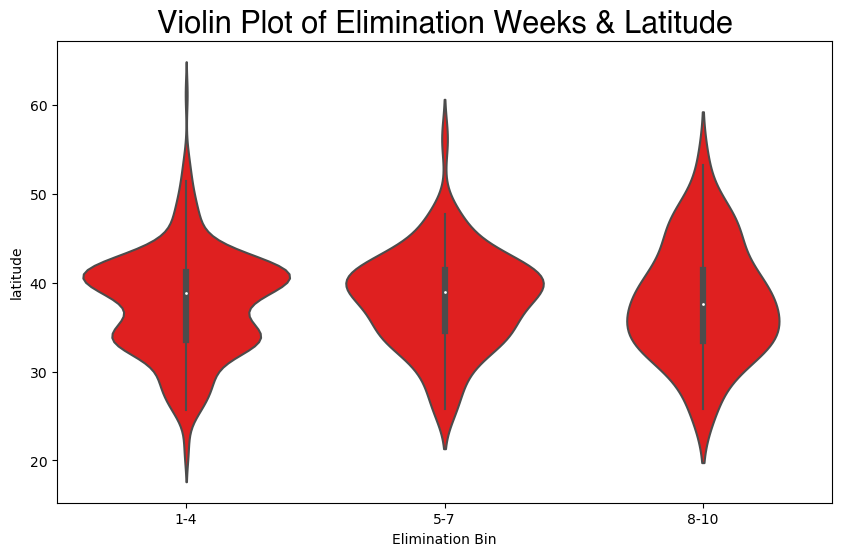

In [32]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df4, x="Elimination Bin", y="latitude", color="red")
plt.title("Violin Plot of Elimination Weeks & Latitude", fontsize=22, fontweight="bold", fontname = "Helvetica" )
plt.show()

In [ ]:
#People from the south are more represented and do better than contestants from the north
# More people eliminated in later weeks are from southern latitudes

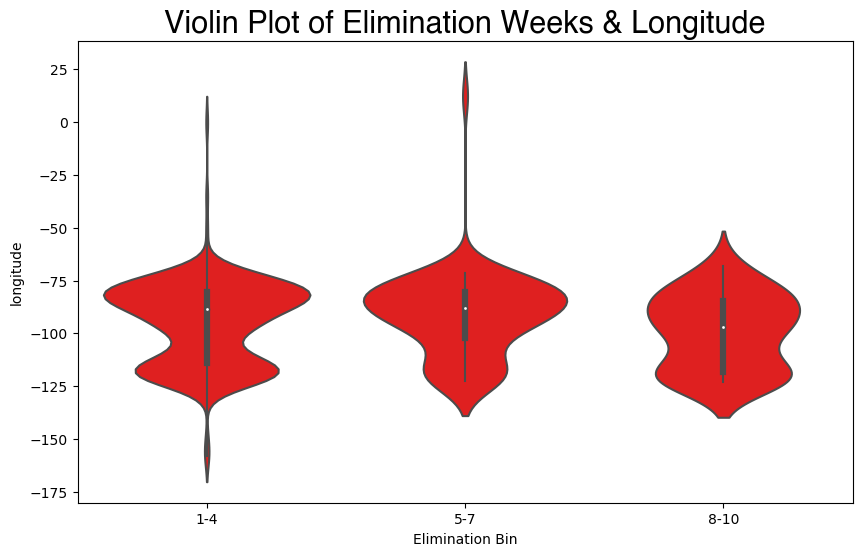

In [33]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="Elimination Bin", y="longitude", color="red")
plt.title("Violin Plot of Elimination Weeks & Longitude", fontsize=22, fontweight="bold", fontname = "Helvetica" )
plt.show()

In [ ]:
# The longitude is east/west coast, don't see a pattern there is people from Texas are in the middle, 
#and people from Florida do good and balance out the people from new york/boston who do poorly

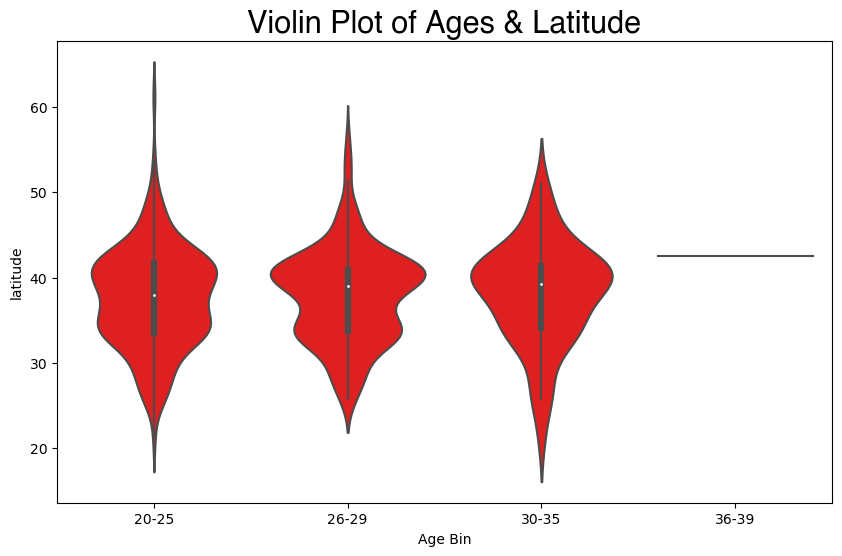

In [34]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df4, x="Age Bin", y="latitude", color="red")
plt.title("Violin Plot of Ages & Latitude", fontsize=22, fontweight="bold", fontname = "Helvetica" )
plt.show()

In [ ]:
#The pattern in the age bin graph, younger people in the 20-25 bin are more likely to be from the south 
#than any other age bin. 

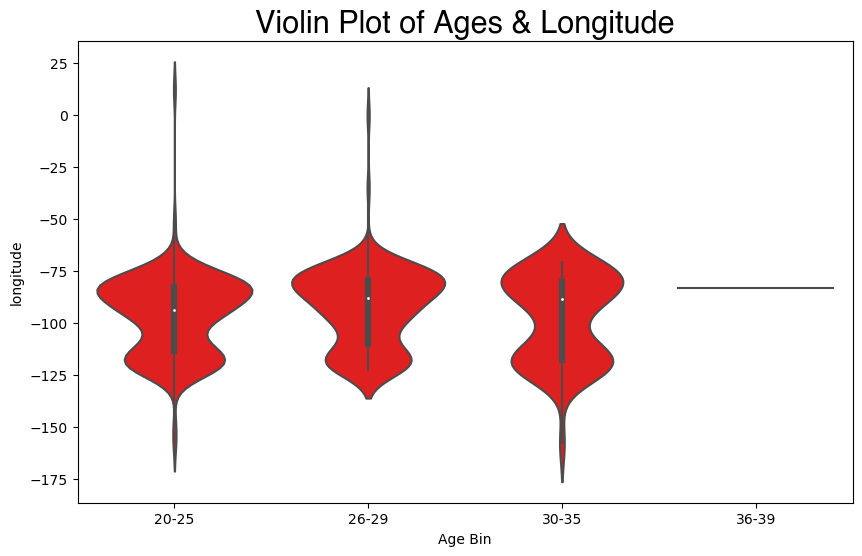

In [35]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="Age Bin", y="longitude", color="red")
plt.title("Violin Plot of Ages & Longitude", fontsize=22, fontweight="bold", fontname = "Helvetica" )
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Season            422 non-null    int64  
 1   Name              422 non-null    object 
 2   Last Name         379 non-null    object 
 3   Followers(k)      112 non-null    float64
 4   Age               422 non-null    float64
 5   City              422 non-null    object 
 6   State             419 non-null    object 
 7   Country           422 non-null    object 
 8   Occupation        422 non-null    object 
 9   Outcome           422 non-null    object 
 10  Elimination_Week  422 non-null    int64  
 11  Place             271 non-null    float64
 12  Note              14 non-null     object 
 13  Was_Bachelorette  422 non-null    int64  
 14  Address           422 non-null    object 
 15  latitude          417 non-null    float64
 16  longitude         417 non-null    float64
 1

In [37]:
#Regression adding in location
df5 = df.loc[:,["Season","Age","Occupation","Elimination_Week", "latitude", "longitude"]].dropna()
df5 = pd.get_dummies(df5)
df5.head()

,Season,Age,Elimination_Week,latitude,longitude,Occupation_Beautician,Occupation_Education,Occupation_Entertainment,Occupation_Entrepreneur,Occupation_Fashion/Design,...,Occupation_Law Related Field,Occupation_Media,Occupation_Real Estate,Occupation_Real Estate Agent,Occupation_Sales,Occupation_Service Industry,Occupation_Student,Occupation_Transportation,Occupation_Unemployed,Occupation_Veteran
0,18,24.0,3,41.757170,-88.314754,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,19,28.0,1,33.891599,-118.395124,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,18,31.0,1,28.677968,-81.511521,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18,25.0,1,33.004013,-97.225848,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,19,26.0,4,40.857929,-74.081669,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/

#One hot enconding
#Most Machine Learning algorithms cannot work with categorical data and needs to be converted into numerical data.
#One Hot Encoding technique
#One hot encoding algorithm is an encoding system of Sci-kit learn library.
#One Hot Encoding is used to convert numerical categorical variables into binary vectors. 
#BUsing get_dummies approach

In [ ]:
# https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/#:~:text=A%20one%20hot%20encoding%20is,is%20marked%20with%20a%201.

#One hot encoding
#A one hot encoding is a representation of categorical variables as binary vectors. 
#This first requires that the categorical values be mapped to integer values. 
#Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1

In [38]:
def checkShapeOfData(df, col):
    # make histogram plot
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"HistPlot of {col}")
    plt.show()
    print()
    
    # boxplots
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot of {col}")
    plt.show()
    print()
    
    # If the data is in a dataframe, we use pandas to give quartile calculations
    quartiles = df[col].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # normaltest
    print()
    print("Normal test:")
    num = int(len(df)*0.1)

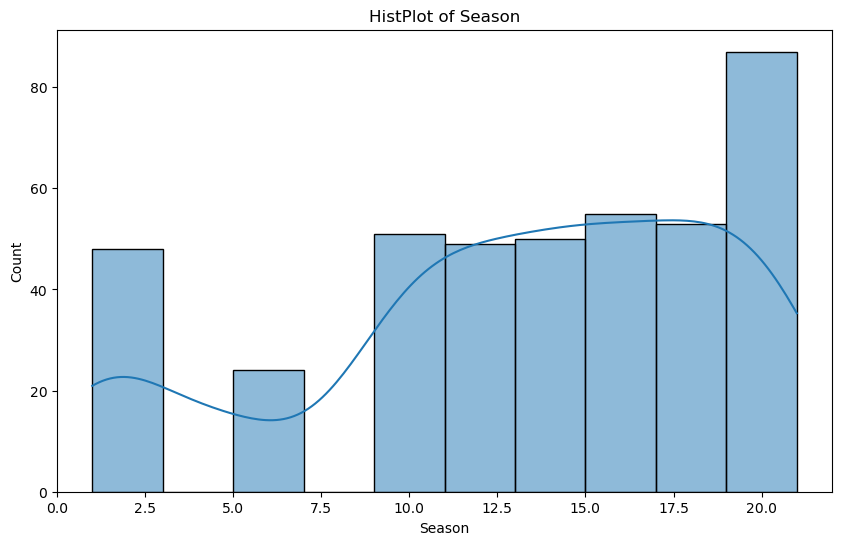

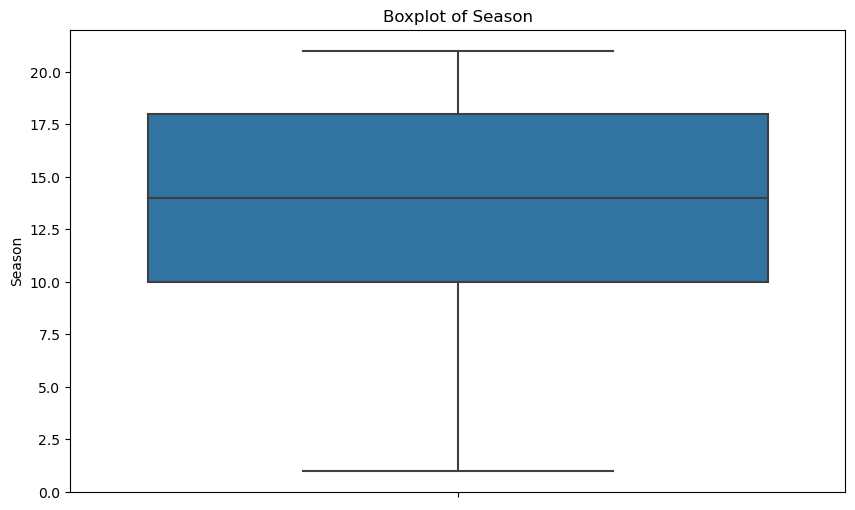


Values below -2.0 could be outliers.
Values above 30.0 could be outliers.

Normal test:


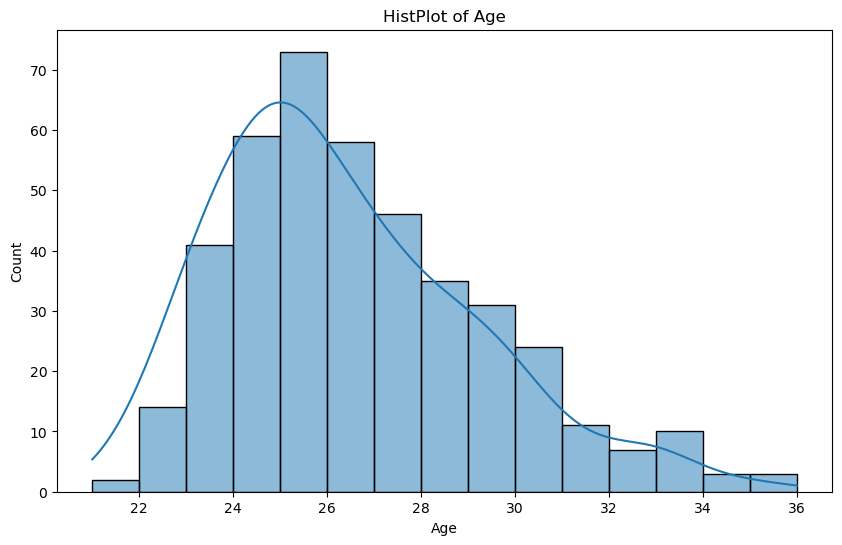

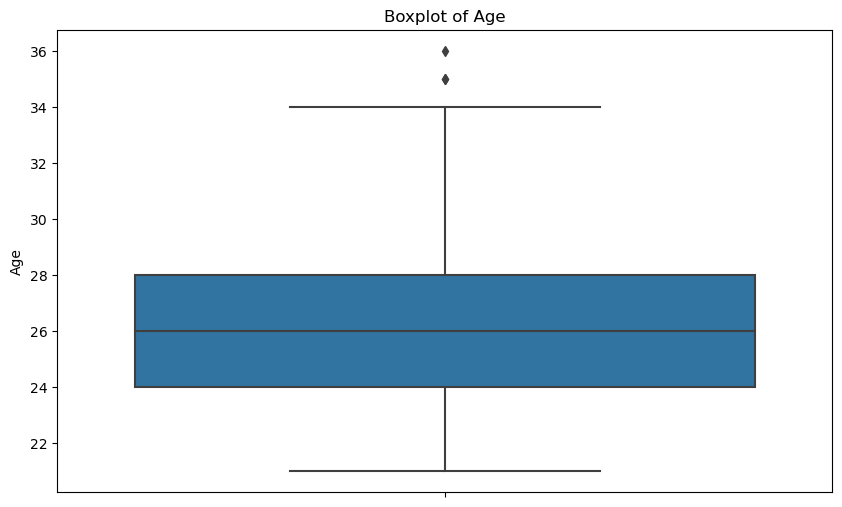


Values below 18.0 could be outliers.
Values above 34.0 could be outliers.

Normal test:


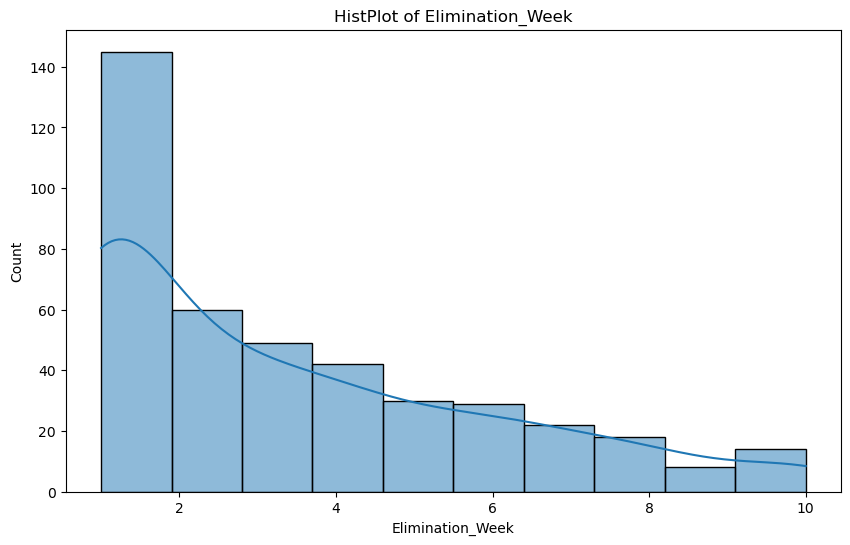

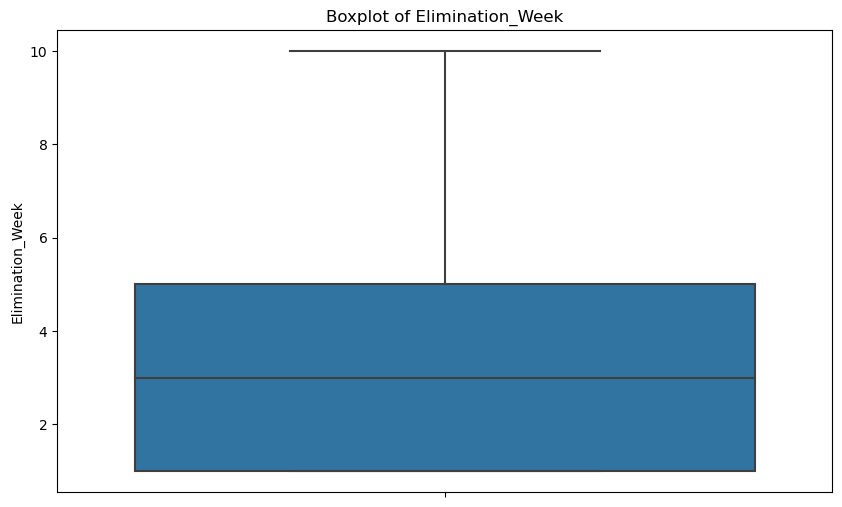


Values below -5.0 could be outliers.
Values above 11.0 could be outliers.

Normal test:


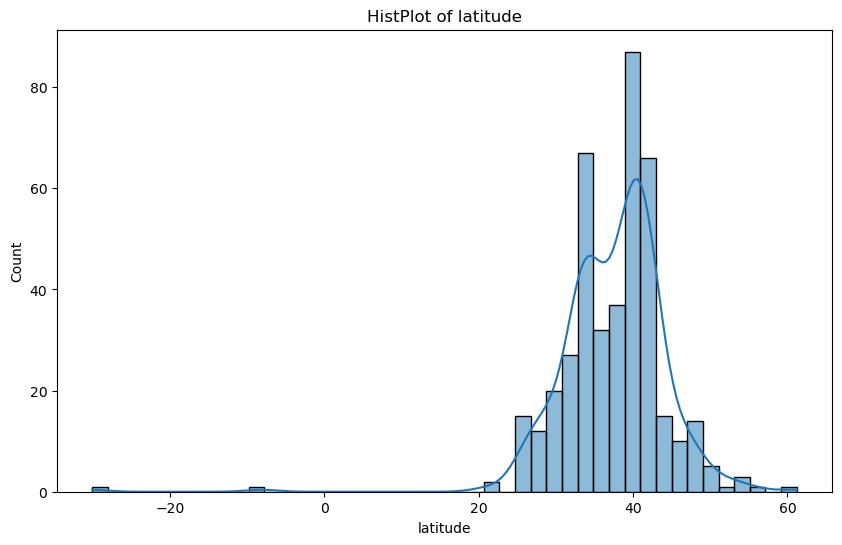

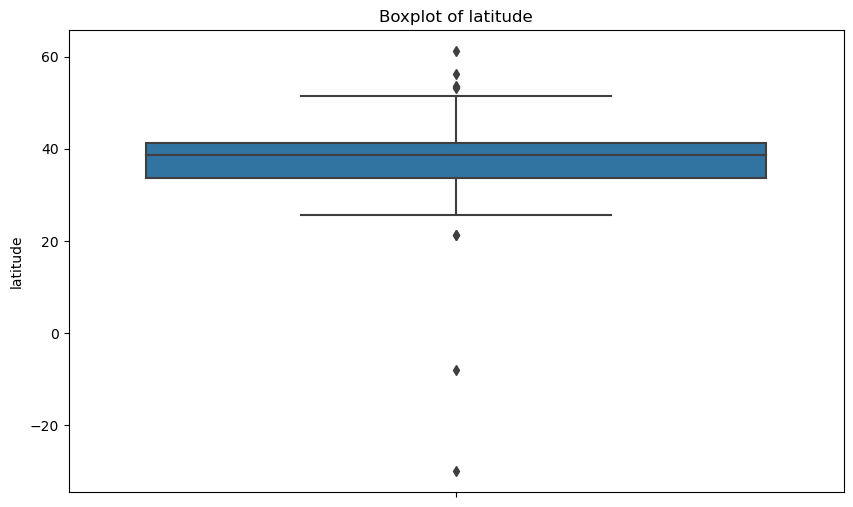


Values below 22.10331695 could be outliers.
Values above 52.870163749999996 could be outliers.

Normal test:


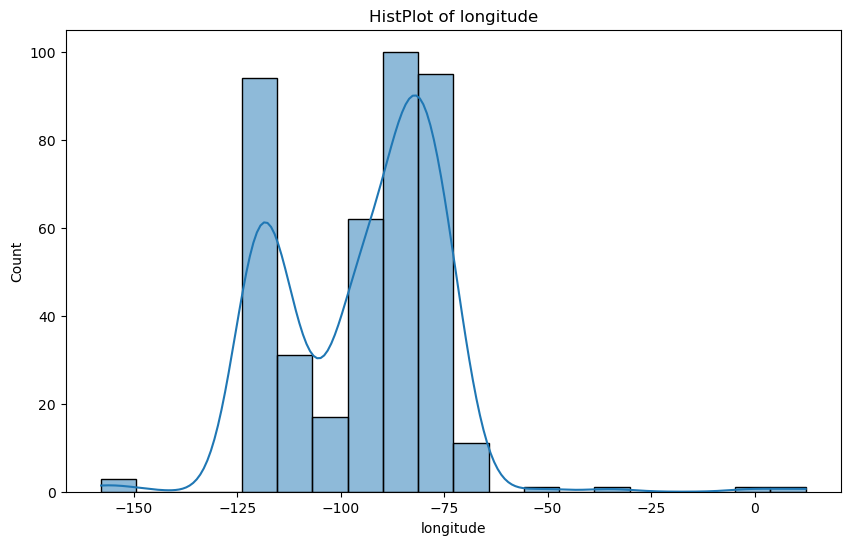

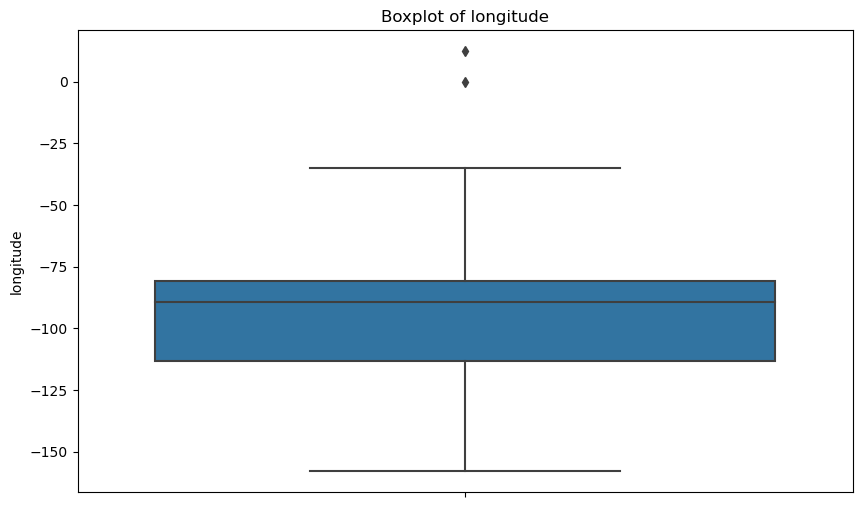


Values below -162.13062589999998 could be outliers.
Values above -31.906640300000007 could be outliers.

Normal test:


In [40]:
cols = df5.describe().columns[0:5]
for col in cols:
    checkShapeOfData(df5, col)

In [41]:
df5.corr()

,Season,Age,Elimination_Week,latitude,longitude,Occupation_Beautician,Occupation_Education,Occupation_Entertainment,Occupation_Entrepreneur,Occupation_Fashion/Design,...,Occupation_Law Related Field,Occupation_Media,Occupation_Real Estate,Occupation_Real Estate Agent,Occupation_Sales,Occupation_Service Industry,Occupation_Student,Occupation_Transportation,Occupation_Unemployed,Occupation_Veteran
Season,1.000000,-0.002270,0.226080,0.068567,0.006870,0.081298,0.003462,-0.039311,0.042944,-0.027073,...,-0.055272,0.015616,-0.025083,0.049706,-0.079760,0.054713,-0.107932,-0.027454,0.067018,0.046797
Age,-0.002270,1.000000,-0.094731,0.084085,0.035054,0.087814,0.045951,0.040749,-0.036864,0.012235,...,0.078571,-0.079000,0.087187,0.082097,-0.028586,0.013169,-0.169183,-0.036389,-0.076887,0.003863
Elimination_Week,0.226080,-0.094731,1.000000,0.049697,-0.015834,0.053376,-0.003509,-0.007907,0.101805,0.008723,...,-0.081361,0.000586,0.045608,-0.045439,-0.042997,0.032846,-0.064459,0.000554,-0.016482,-0.010519
latitude,0.068567,0.084085,0.049697,1.000000,-0.096317,-0.023434,-0.015231,-0.037359,-0.025608,0.059635,...,-0.201988,0.071642,0.017220,-0.028260,-0.003462,0.046974,-0.056981,0.006877,-0.023389,-0.049570
longitude,0.006870,0.035054,-0.015834,-0.096317,1.000000,-0.058787,0.088838,-0.022895,0.043432,0.037029,...,0.098313,0.004467,0.026479,-0.043362,0.020073,-0.085510,0.072528,-0.100146,0.014902,0.045217
Occupation_Beautician,0.081298,0.087814,0.053376,-0.023434,-0.058787,1.000000,-0.055309,-0.046272,-0.035486,-0.052062,...,-0.053161,-0.069903,-0.039822,-0.010108,-0.074354,-0.077813,-0.046272,-0.032314,-0.036981,-0.014312
Occupation_Education,0.003462,0.045951,-0.003509,-0.015231,0.088838,-0.055309,1.000000,-0.060218,-0.046181,-0.067753,...,-0.069183,-0.090971,-0.051825,-0.013154,-0.096764,-0.101265,-0.060218,-0.042054,-0.048127,-0.018625
Occupation_Entertainment,-0.039311,0.040749,-0.007907,-0.037359,-0.022895,-0.046272,-0.060218,1.000000,-0.038635,-0.056682,...,-0.057879,-0.076106,-0.043356,-0.011005,-0.080952,-0.084718,-0.050378,-0.035182,-0.040263,-0.015582
Occupation_Entrepreneur,0.042944,-0.036864,0.101805,-0.025608,0.043432,-0.035486,-0.046181,-0.038635,1.000000,-0.043470,...,-0.044388,-0.058366,-0.033250,-0.008439,-0.062083,-0.064971,-0.038635,-0.026981,-0.030878,-0.011950
Occupation_Fashion/Design,-0.027073,0.012235,0.008723,0.059635,0.037029,-0.052062,-0.067753,-0.056682,-0.043470,1.000000,...,-0.065122,-0.085630,-0.048782,-0.012382,-0.091082,-0.095320,-0.056682,-0.039585,-0.045301,-0.017531


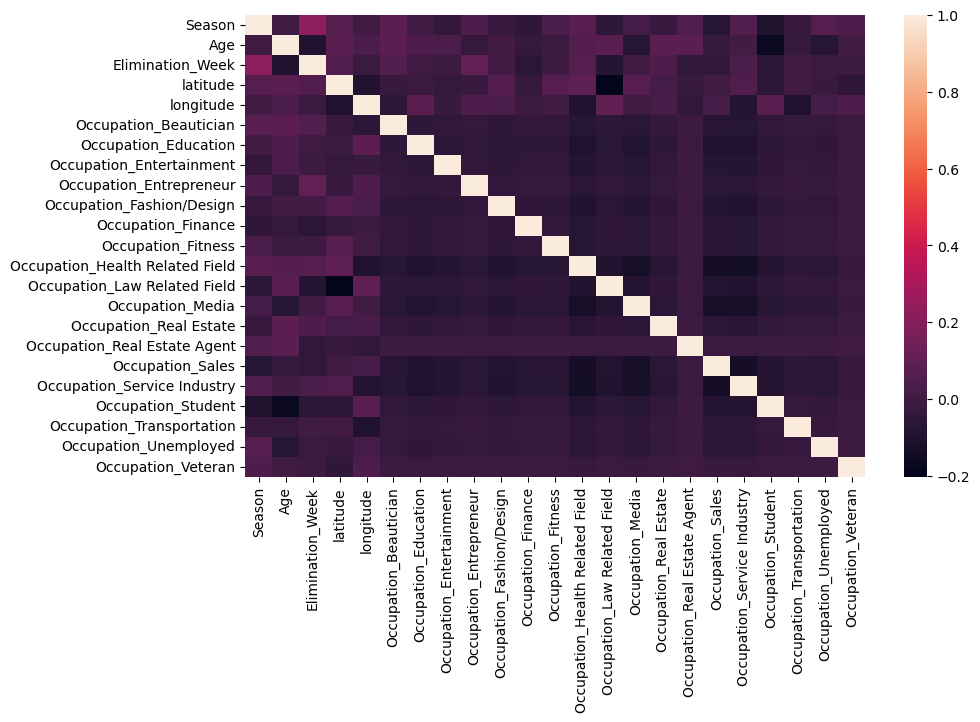

In [42]:
corrs = df5.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corrs)
plt.show()

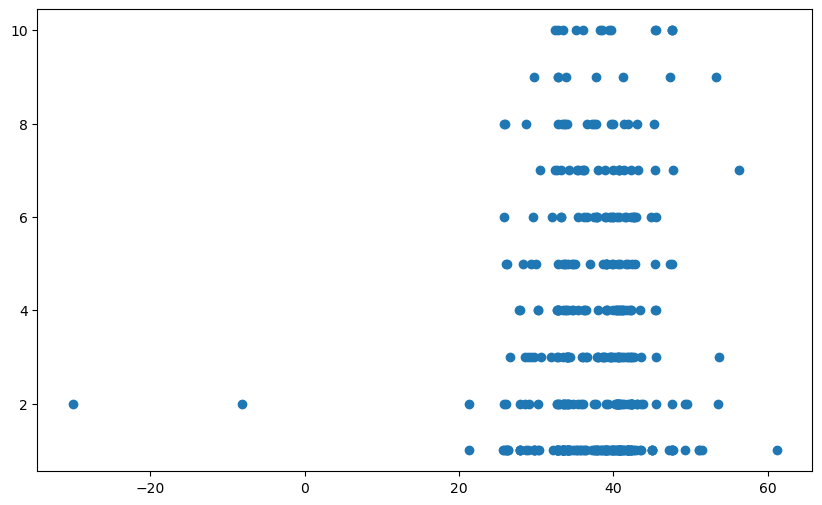

In [43]:
#Scatter Plot of latitude and elimination week but not super useful since 
#we use other columns besides latitude or age to predict elimination week

plt.figure(figsize=(10,6))
plt.scatter(df5.latitude, df5.Elimination_Week)  

plt.show()

In [44]:
feature = df5.drop("Elimination_Week", axis = 1)
target = df5["Elimination_Week"]      

In [45]:
# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Elimination_Week   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     1.902
Date:                Sat, 12 Nov 2022   Prob (F-statistic):            0.00995
Time:                        14:30:18   Log-Likelihood:                -966.81
No. Observations:                 417   AIC:                             1978.
Df Residuals:                     395   BIC:                             2066.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               4.2799      1.468      2.915      0.004       1.394       7.166
Season                              0.0908      0.022      4.200      0.000       0.048       0.133
Age                                -0.1058      0.047     -2.268      0.024      -0.198      -0.014
latitude                            0.0092      0.019      0.498      0.619      -0.027       0.046
longitude                           0.0002      0.007      0.028      0.977      -0.013       0.013
Occupation_Beautician               0.9782      0.631      1.550      0.122      -0.262       2.219
Occupation_Education                0.3996      0.502      0.796      0.426      -0.587       1.386
Occupation_Entertainment            0.4547      0.579      0.785      0.433      -0.684       1.593
Occupation_Entrepreneur             1.7255      0.721      2.395      0.017       0.309       3.142
Occupation_Fashion/Design           0.5324      0.528      1.009      0.314      -0.505       1.570
Occupation_Finance                 -0.3508      0.633     -0.554      0.580      -1.596       0.894
Occupation_Fitness                  0.1518      0.623      0.244      0.807      -1.072       1.376
Occupation_Health Related Field     0.7366      0.408      1.804      0.072      -0.066       1.539
Occupation_Law Related Field       -0.1732      0.523     -0.331      0.741      -1.201       0.855
Occupation_Media                    0.2851      0.425      0.671      0.503      -0.550       1.120
Occupation_Real Estate              1.1925      0.661      1.804      0.072      -0.107       2.492
Occupation_Real Estate Agent       -2.0125      2.424     -0.830      0.407      -6.778       2.753
Occupation_Sales                    0.1752      0.406      0.432      0.666      -0.623       0.973
Occupation_Service Industry         0.5375      0.402      1.336      0.182      -0.253       1.328
Occupation_Student                 -0.3029      0.576     -0.526      0.599      -1.436       0.830
Occupation_Transportation           0.4214      0.792      0.532      0.595      -1.136       1.979
Occupation_Unemployed              -0.1674      0.696     -0.241      0.810      -1.535       1.200
Occupation_Veteran                 -0.3038      1.707     -0.178      0.859      -3.659       3.051
==============================================================================
Omnibus:                       35.412   Durbin-Watson:                   0.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.843
Skew:                           0.779   Prob(JB):                     4.97e-10
Kurtosis:                       2.807   Cond. No.                     1.39e+18
==============================================================================

Notes:
[

In [46]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)
print(reg.score(np.array(feature), np.array(target)))

[ 9.08107960e-02 -1.05845889e-01  9.23957606e-03  1.88669170e-04
  7.40446716e-01  1.61870506e-01  2.16930489e-01  1.48771585e+00
  2.94598344e-01 -5.88565852e-01 -8.59388840e-02  4.98787399e-01
 -4.10959718e-01  4.72860313e-02  9.54761177e-01 -2.25023063e+00
 -6.25591152e-02  2.99724770e-01 -5.40717296e-01  1.83601117e-01
 -4.05138034e-01 -5.41612862e-01]
4.5176926633227765
0.09182613425590547


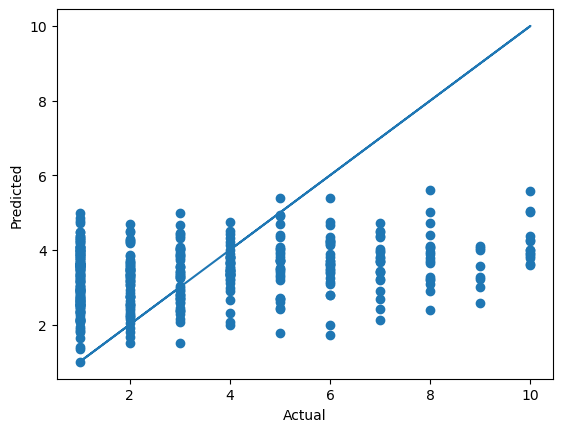

In [47]:
plt.scatter(target, reg.predict(np.array(feature)))
plt.plot(target, target)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [48]:
rf = RandomForestRegressor()
rf.fit(np.array(feature), np.array(target))
print(rf.score(np.array(feature), np.array(target)))

0.8492584567102223


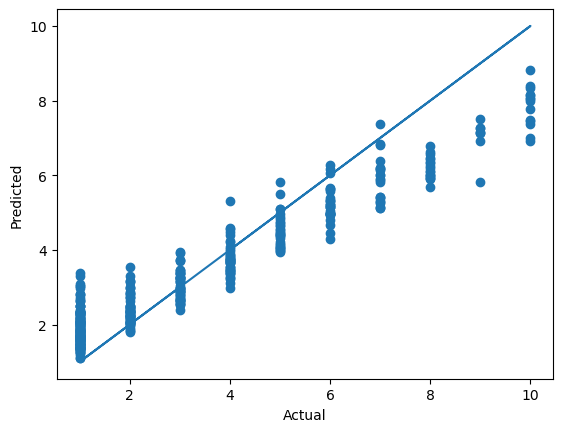

In [49]:
plt.scatter(target, rf.predict(np.array(feature)))
plt.plot(target, target)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [50]:
data = feature.iloc[0]
data

Season                             18.000000
Age                                24.000000
latitude                           41.757170
longitude                         -88.314754
Occupation_Beautician               0.000000
Occupation_Education                0.000000
Occupation_Entertainment            0.000000
Occupation_Entrepreneur             0.000000
Occupation_Fashion/Design           0.000000
Occupation_Finance                  0.000000
Occupation_Fitness                  0.000000
Occupation_Health Related Field     0.000000
Occupation_Law Related Field        0.000000
Occupation_Media                    1.000000
Occupation_Real Estate              0.000000
Occupation_Real Estate Agent        0.000000
Occupation_Sales                    0.000000
Occupation_Service Industry         0.000000
Occupation_Student                  0.000000
Occupation_Transportation           0.000000
Occupation_Unemployed               0.000000
Occupation_Veteran                  0.000000
Name: 0, d

In [60]:
data["Season"] = 21
data["Age"] = 26
data["Occupation_Media"] = 0
data["Occupation_Unemployed"] = 1
data["latitude"] = 32
data["longitude"] = -96

reg.predict([data])

/var/folders/qy/8015481d5lj05ktcbj2649ym0000gn/T/ipykernel_30832/3976077389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Season"] = 21
/var/folders/qy/8015481d5lj05ktcbj2649ym0000gn/T/ipykernel_30832/3976077389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Age"] = 26
/var/folders/qy/8015481d5lj05ktcbj2649ym0000gn/T/ipykernel_30832/3976077389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Occupation_M

array([3.54514243])

In [51]:
df5.Elimination_Week.value_counts()

1     145
2      60
3      49
4      42
5      30
6      29
7      22
8      18
10     14
9       8
Name: Elimination_Week, dtype: int64

In [52]:
df5.groupby("Season").Elimination_Week.max()

Season
1      6
2      7
5      8
9      8
10     9
11     8
12     8
13     8
14     8
15    10
16    10
17    10
18    10
19    10
20    10
21    10
Name: Elimination_Week, dtype: int64

In [53]:
df5.groupby(["Season","Elimination_Week"]).Age.mean()

Season  Elimination_Week
1       1                   27.700000
        2                   26.000000
        3                   26.333333
        4                   24.000000
        5                   24.000000
                              ...    
21      6                   27.000000
        7                   27.500000
        8                   24.000000
        9                   31.000000
        10                  27.000000
Name: Age, Length: 140, dtype: float64